<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-확인" data-toc-modified-id="1.-데이터-확인-1">1. 데이터 확인</a></span></li><li><span><a href="#2.-데이터-보완" data-toc-modified-id="2.-데이터-보완-2">2. 데이터 보완</a></span></li><li><span><a href="#3.-EDA" data-toc-modified-id="3.-EDA-3">3. EDA</a></span><ul class="toc-item"><li><span><a href="#3.1-업종별-회사-수-파악" data-toc-modified-id="3.1-업종별-회사-수-파악-3.1">3.1 업종별 회사 수 파악</a></span></li><li><span><a href="#3.2-업종PER와-업종별-PER-평균-비교" data-toc-modified-id="3.2-업종PER와-업종별-PER-평균-비교-3.2">3.2 업종PER와 업종별 PER 평균 비교</a></span></li></ul></li></ul></div>

# 1. 데이터 확인

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Company Guide 데이터
data = pd.read_csv('./data/FnGuide_PER,PBR.csv')
data.replace('-', np.nan, inplace=True)
data.head()

,회사명,종목코드,업종,업종1,업종2,PER,업종PER,PBR
0,나우코스,257990,기타 화학제품 제조업,KONEX,FICS 개인생활용품,29.21,NaN,6.43
1,에이스캠퍼,322190,자동차 차체 및 트레일러 제조업,KONEX,FICS 기계,NaN,NaN,19.07
2,유안타제7호스팩,367460,금융 지원 서비스업,KOSDAQ 코스닥 금융,FICS 창업투자 및 종금,NaN,22.62,NaN
3,루트락,253610,기타 전문 도매업,KONEX,FICS 의료 장비 및 서비스,NaN,NaN,NaN
4,ESR켄달스퀘어리츠,365550,부동산 임대 및 공급업,KSE 코스피 서비스업,FICS 부동산,NaN,35.79,NaN


In [4]:
data['업종'].value_counts()

특수 목적용 기계 제조업          141
소프트웨어 개발 및 공급업         135
전자부품 제조업               121
자동차 신품 부품 제조업           97
기타 금융업                  93
                      ... 
기타 전문 서비스업               1
사업시설 유지·관리 서비스업          1
기타 교육기관                  1
재 보험업                    1
건축자재, 철물 및 난방장치 도매업      1
Name: 업종, Length: 158, dtype: int64

In [5]:
len(data[data['PER'].isnull()])

905

In [6]:
len(data[data['PBR'].isnull()])

74

In [7]:
# 네이버금융 데이터
data2 = pd.read_csv('./data/네이버금융_PER,PBR.csv')
data2.head()

,회사명,종목코드,업종,업종2,업종PER,PER,PBR
0,나우코스,257990,기타 화학제품 제조업,NaN,NaN,NaN,NaN
1,에이스캠퍼,322190,자동차 차체 및 트레일러 제조업,NaN,NaN,NaN,NaN
2,유안타제7호스팩,367460,금융 지원 서비스업,창업투자,20.78,NaN,NaN
3,루트락,253610,기타 전문 도매업,NaN,NaN,NaN,NaN
4,ESR켄달스퀘어리츠,365550,부동산 임대 및 공급업,NaN,NaN,NaN,NaN


In [8]:
data2['업종2'].unique()

array([nan, '창업투자', '기타', '화학', '제약', '생명과학도구및서비스', '소프트웨어', 'IT서비스',
       '반도체와반도체장비', '자동차부품', '생물공학', '전자장비와기기', '컴퓨터와주변기기', '화장품', '전기장비',
       '손해보험', '건강관리장비와용품', '식품', '디스플레이장비및부품', '방송과엔터테인먼트', '기계', '건설',
       '가정용품', '게임엔터테인먼트', '섬유,의류,신발,호화품', '핸드셋', '광고', '우주항공과국방',
       '에너지장비및서비스', '건축자재', '건강관리기술', '통신장비', '교육서비스', '건강관리업체및서비스',
       '해운사', '인터넷과카탈로그소매', '증권', '가구', '양방향미디어와서비스', '가정용기기와용품', '전기제품',
       '식품과기본식료품소매', '비철금속', '포장재', '은행', '호텔,레스토랑,레저', '항공사', '철강',
       '전자제품', '백화점과일반상점', '판매업체', '출판', '가스유틸리티', '석유와가스', '레저용장비와제품',
       '부동산', '조선', '도로와철도운송', '음료', '생명보험', '종이와목재', '복합기업', '기타금융',
       '건축제품', '상업서비스와공급품', '복합유틸리티', '항공화물운송과물류', '전문소매', '디스플레이패널',
       '전기유틸리티', '자동차', '무선통신서비스', '카드', '문구류', '운송인프라', '독립전력생산및에너지거래',
       '무역회사와판매업체', '다각화된통신서비스', '담배', '사무용전자제품'], dtype=object)

In [9]:
len(data2[data2['업종2'].isnull()])

167

In [10]:
len(data2[data2['PER'].isnull()])

1070

# 2. 데이터 보완

네이버금융 데이터의 결측치가 더 많기는 하지만, Company Guide 데이터는 2019년 12월 기준으로 최신성을 반영하지 못함

따라서 **네이버금융 데이터에 Company Guide 데이터를 병합하여 결측치를 보완**해보고자 함

In [11]:
naver_업종per = data2[data2['업종PER'].isnull()].index
fnguide_업종per = data[data['업종PER'].isnull()].index

In [12]:
# 네이버금융 업종PER 결측치 (공통 결측치 제외)
업종per_idx = list(set(naver_업종per) - set(fnguide_업종per))
len(업종per_idx)

19

In [13]:
naver_per = data2[data2['PER'].isnull()].index
fnguide_per = data[data['PER'].isnull()].index

In [14]:
# 네이버금융 PER 결측치 (공통 결측치 제외)
per_idx = list(set(naver_per) - set(fnguide_per))
len(per_idx)

310

In [15]:
naver_pbr = data2[data2['PBR'].isnull()].index
fnguide_pbr = data[data['PBR'].isnull()].index

In [16]:
# 네이버금융 PBR 결측치 (공통 결측치 제외)
pbr_idx = list(set(naver_pbr) - set(fnguide_pbr))
len(pbr_idx)

998

In [17]:
import warnings
warnings.filterwarnings('ignore')

data3 = data2.copy()

# 네이버금융 데이터 결측치 수정
for i in 업종per_idx:
    data3['업종PER'][i] = data['업종PER'][i]
for i in per_idx:
    data3['PER'][i] = data['PER'][i]
for i in pbr_idx:
    data3['PBR'][i] = data['PBR'][i]

In [18]:
data3.head()

,회사명,종목코드,업종,업종2,업종PER,PER,PBR
0,나우코스,257990,기타 화학제품 제조업,NaN,NaN,29.21,6.43
1,에이스캠퍼,322190,자동차 차체 및 트레일러 제조업,NaN,NaN,NaN,19.07
2,유안타제7호스팩,367460,금융 지원 서비스업,창업투자,20.78,NaN,NaN
3,루트락,253610,기타 전문 도매업,NaN,NaN,NaN,NaN
4,ESR켄달스퀘어리츠,365550,부동산 임대 및 공급업,NaN,35.79,NaN,NaN


In [19]:
data3.to_csv('./data/네이버금융_FnGuide.csv')

# 3. EDA

## 3.1 업종별 회사 수 파악

'업종2'와 '업종PER'는 네이버금융에서 스크래핑한 데이터이기 때문에, '업종PER'는 '업종2'를 기준으로 산정되어 있음

따라서 '업종' 칼럼이 아닌 **'업종2' 칼럼으로 EDA를 진행함**

In [61]:
import matplotlib.pyplot as plt

# 시각화 한글 처리
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

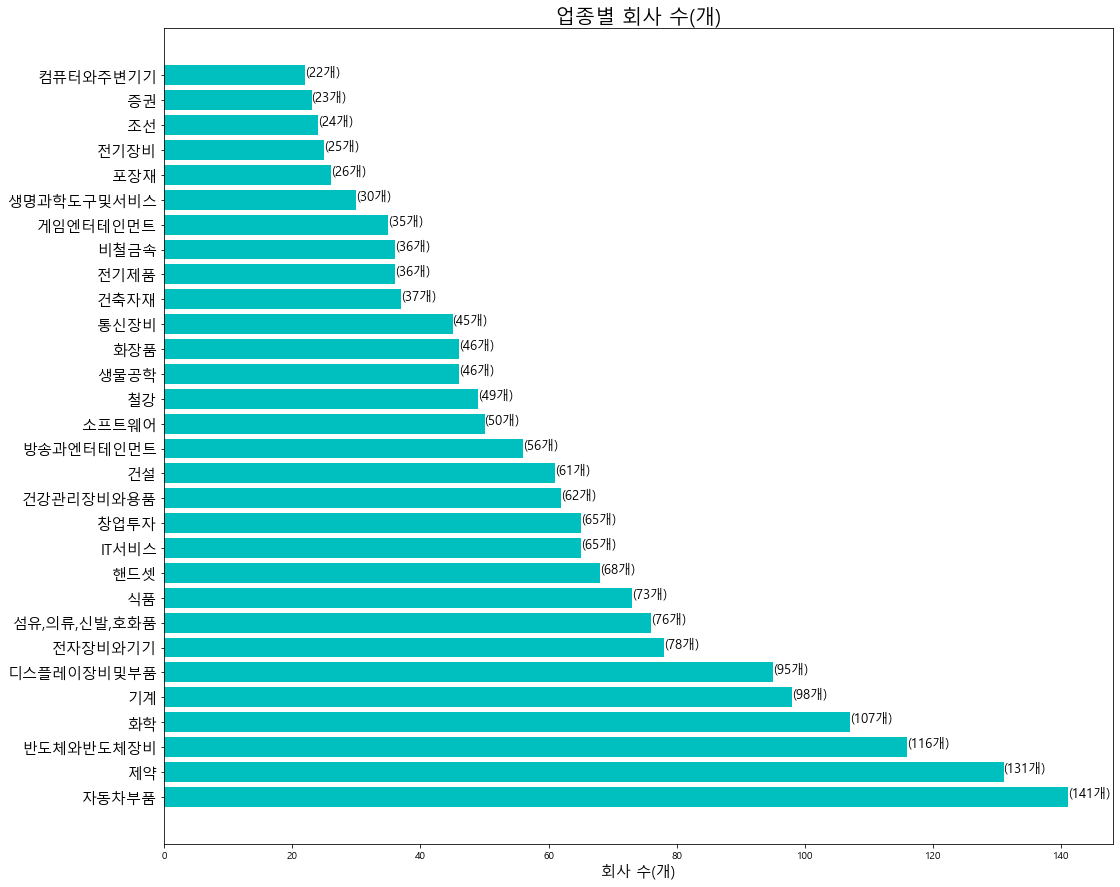

In [71]:
attr = data3['업종2'].value_counts().iloc[:30].index
v1 = data3['업종2'].value_counts().iloc[:30]

plt.figure(figsize=(17,15))
plt.barh(attr, v1, tick_label=attr, color='c')
plt.title('업종별 회사 수(개)', fontsize=20)
plt.xlabel('회사 수(개)',fontsize=15)
plt.yticks(fontsize=15)

for i in range(len(attr)):
    detail = '(%d개)'%v1[i]
    plt.text(v1[i], attr[i], detail, fontsize=13)
    
plt.show()

## 3.2 업종PER와 업종별 PER 평균 비교

In [76]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2411 entries, 0 to 2410
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   회사명     2411 non-null   object 
 1   종목코드    2411 non-null   int64  
 2   업종      2411 non-null   object 
 3   업종2     2244 non-null   object 
 4   업종PER   2264 non-null   float64
 5   PER     1651 non-null   object 
 6   PBR     2339 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 132.0+ KB


In [83]:
data3.replace(',','',inplace=True)
data3['PER'] = data3['PER'].astype('float')

ValueError: could not convert string to float: '1,468.77'

In [75]:
data3.groupby(['업종2'])['PER'].mean()

DataError: No numeric types to aggregate